## Data Cleaning##

I will be loading the data for this project. This will be my first time looking at the data so you will see me exploring the data.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [35]:
file_path = 'Data-file-Europe-Power-Sector-2020.xlsx'
df = pd.read_excel(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10710 entries, 0 to 10709
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       10710 non-null  int64  
 1   Area                       10710 non-null  object 
 2   Variable                   10710 non-null  object 
 3   Generation (TWh)           10710 non-null  float64
 4   Share of production (%)    8820 non-null   float64
 5   Change on last year (%)    8611 non-null   float64
 6   Change on last year (TWh)  10200 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 585.8+ KB


#### First Look ####
1. It looks like our d-types are good.
2. The file size isnt crazy so processing wont be bad.
3. We have some NaN values in column 4 - 6

I will look at the head() tail() and sample() of the data to see what the values are looking like and see if we can fill the data in with some placeholder. I will also create a filter to flag the mising data if we need to look at it again.

In [36]:
df.head()

,Year,Area,Variable,Generation (TWh),Share of production (%),Change on last year (%),Change on last year (TWh)
0,2000,Austria,Fossil,16.418859,27.432215,NaN,NaN
1,2000,Austria,Coal,5.727000,9.568527,NaN,NaN
2,2000,Austria,Hard Coal,4.435000,7.409886,NaN,NaN
3,2000,Austria,Lignite,1.292000,2.158641,NaN,NaN
4,2000,Austria,Gas,7.851000,13.117252,NaN,NaN


In [37]:
df.tail()

,Year,Area,Variable,Generation (TWh),Share of production (%),Change on last year (%),Change on last year (TWh)
10705,2020,United Kingdom,Bioenergy,35.468198,11.610779,4.415895,1.500000
10706,2020,United Kingdom,Other renewables,0.009298,0.003044,0.000000,0.000000
10707,2020,United Kingdom,Production,305.476470,NaN,-4.393771,-14.038769
10708,2020,United Kingdom,Net imports,18.213088,NaN,-13.597032,-2.866151
10709,2020,United Kingdom,Demand,323.689558,NaN,-4.963357,-16.904920


In [38]:
df[df[r'Share of production (%)'] == 100]
### I DONT LIKE THE NAME OF THE COLUMNS. I WILL CHANGE THESE SO THEY ARE MORE PYTHON FRIENDLY

,Year,Area,Variable,Generation (TWh),Share of production (%),Change on last year (%),Change on last year (TWh)
68,2000,Cyprus,Fossil,3.370,100.0,NaN,NaN
73,2000,Cyprus,Other fossil,3.370,100.0,NaN,NaN
340,2000,Malta,Fossil,1.917,100.0,NaN,NaN
345,2000,Malta,Other fossil,1.917,100.0,NaN,NaN
578,2001,Cyprus,Fossil,3.551,100.0,5.370920,0.181
583,2001,Cyprus,Other fossil,3.551,100.0,5.370920,0.181
850,2001,Malta,Fossil,1.943,100.0,1.356286,0.026
855,2001,Malta,Other fossil,1.943,100.0,1.356286,0.026
1088,2002,Cyprus,Fossil,3.785,100.0,6.589693,0.234
1093,2002,Cyprus,Other fossil,3.785,100.0,6.589693,0.234


In [49]:
df.rename(columns={'Year': 'year', 'Area': 'area', 'Variable': 'variable', r'Generation (TWh)': 'generation_TWh', r'Share of production (%)': 'share_of_production_percent', r'Change on last year (%)': 'change_on_last_year_percent', r'Change on last year (TWh)': 'change_on_last_year_TWh'}, inplace = True)
df.head()

,year,area,variable,generation_TWh,share_of_production_percent,change_on_last_year_percent,change_on_last_year_TWh
0,2000,Austria,Fossil,16.418859,27.432215,NaN,NaN
1,2000,Austria,Coal,5.727000,9.568527,NaN,NaN
2,2000,Austria,Hard Coal,4.435000,7.409886,NaN,NaN
3,2000,Austria,Lignite,1.292000,2.158641,NaN,NaN
4,2000,Austria,Gas,7.851000,13.117252,NaN,NaN


In [54]:
df_nan_flag = df.isna()

In [ ]:
df['']

In [45]:
# plt.plot(x= df['year'], y= df)
df['area'].value_counts()
df['year'].value_counts()
### I WOULD LIKE TO PLOT CHART WITH YEAR IN THE X AND Y IS GENERATION OF TWh WITH LINES FOR EACH VARIABLE

2015    510
2003    510
2008    510
2016    510
2001    510
2009    510
2017    510
2002    510
2010    510
2018    510
2011    510
2007    510
2019    510
2004    510
2012    510
2020    510
2005    510
2013    510
2006    510
2014    510
2000    510
Name: year, dtype: int64

In [62]:
df['variable'].unique().tolist()

['Fossil',
 'Coal',
 'Hard Coal',
 'Lignite',
 'Gas',
 'Other fossil',
 'Nuclear',
 'Renewables',
 'Hydro',
 'Wind and solar',
 'Wind',
 'Solar',
 'Bioenergy',
 'Other renewables',
 'Production',
 'Net imports',
 'Demand']

TypeError: unsupported operand type(s) for -: 'list' and 'int'

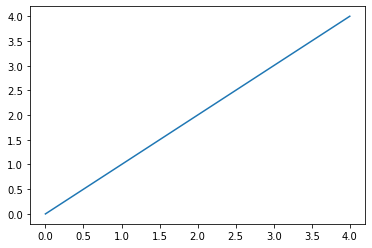

In [48]:
x = df[df['area'] == Austria]
y = [0, 1, 2, 3, 4]
plt.figure()
plt.plot(x, y)

for i in x:
    plt.plot(lambda i, x = range(x-1)) 
             , (y-i))

plt.show()